# Assignment Week 7 - Time Series Analysis and Data Preprocessing

When working with time series data having an accurate and complete dataset is essential for the results of machine learning models trained on this data.

As the dataset is such an important part of training time series machine learning models, e.g. for time series forecasting, this assignment will focus on analyzing and preparing a time series dataset.

A common way to work with time series data is using the Python library `Pandas` that offers a lot of helpful methods to analyze and preprocess the dataset and is therefore recommended to be used in this assignment. Additionally common Large Language Models are very good in assisting while writing `Pandas` code.

There exist alternatives such as `Polars` that are faster but in some cases not as intuitive and with less available resources in the internet.

## Task 1 - Downloading the Dataset

We will be using a subset of the [Jena Climate dataset](https://www.bgc-jena.mpg.de/wetter/) that contains weather measurements from 2009 to 2016 for different weather factors such as temperature, humidity, wind speed, etc in a 10 minute resolution.

Download and unzip the dataset using the provided commands (or manually if your local machine can"t execute these shell commands).

In [1]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2024-12-12 15:57:54--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 142.251.179.207, 64.233.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2024-12-12 15:57:54 (113 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [2]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [3]:
!ls

jena_climate_2009_2016.csv  jena_climate_2009_2016.csv.zip  sample_data


## Task 2 - Data Analysis and Cleaning

1. Load the CSV file to a Pandas DataFrame.
2. Analyze aspects of the time series dataset using the `df.info()`and `df.describe()` methods. Can you identify missing values? Are there any outliers or incorrect values? What other interesting aspects can you identify?
3. If you identify incorrect values find ways to correct these values as best as possible.
4. Complete the given Python function to identify missing timestamps in the dataset.
5. Add potentially missing timestamps to the DataFrame (don't forget to sort by datetime!) and apply a suitable interpolation technique to fill the missing values for the added timestamps.
6. Choose 3 weather factor measurements and plot them. Analyze them for aspects like trend, seasonality and noise. (Hint: It might be useful to look at the years individually for every weather factor.)


In [25]:
import pandas as pd

# 1. Load the CSV file to a Pandas DataFrame.
df = pd.read_csv('jena_climate_2009_2016.csv') # TODO: Read the CSV file to a DataFrame
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
# 2. Analyze aspects of the time series dataset using the `df.info()`and `df.describe()` methods. Can you identify missing values? Are there any outliers or incorrect values? What other interesting aspects can you identify?

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [9]:
df.isnull().values.any()

False

In [ ]:
# 3. If you identify incorrect values find ways to correct these values as best as possible.

### YOUR CODE GOES HERE ###

In [26]:
# Turn the timestamps to datetime format (format="mixed" is required as not all values in "Date Time" follow the correct format)
# Might take some time because of format="mixed"
df["Date Time"] = pd.to_datetime(df["Date Time"], format="mixed")

In [12]:
# 4. Complete the given Python function to identify missing timestamps in the dataset.

def find_missing_timestamps(df):
  ### YOUR CODE STARTS HERE ###

  # Define the first and last timestamp of the dataset
  start_time = df["Date Time"].min() # TODO: Add the first timestamp of the time series
  end_time = df["Date Time"].max() # TODO: Add the last timestamp of the time series

  # Generate the complete range of timestamps with a 10-minute frequency
  full_timestamp_range = pd.date_range(start=start_time, end=end_time, freq="10T") # TODO: Add frequency value

  # Find missing timestamps
  existing_timestamps = df["Date Time"] # TODO: Get the existing timestamps from the dataset
  missing_timestamps = full_timestamp_range.difference(existing_timestamps)

  ### YOUR CODE ENDS HERE ###

  return missing_timestamps

missing_timestamps = find_missing_timestamps(df)
missing_timestamps

<ipython-input-12-b8a6bd9bfb41>:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_timestamp_range = pd.date_range(start=start_time, end=end_time, freq="10T") # TODO: Add frequency value


DatetimeIndex(['2009-08-10 09:50:00', '2009-08-10 10:00:00',
               '2013-05-16 09:00:00', '2014-07-30 08:10:00',
               '2014-09-24 17:10:00', '2014-09-24 17:20:00',
               '2014-09-24 17:30:00', '2014-09-24 17:40:00',
               '2014-09-24 17:50:00', '2014-09-24 18:00:00',
               ...
               '2016-10-28 11:10:00', '2016-10-28 11:20:00',
               '2016-10-28 11:30:00', '2016-10-28 11:40:00',
               '2016-10-28 11:50:00', '2016-10-28 12:00:00',
               '2016-10-28 12:10:00', '2016-10-28 12:20:00',
               '2016-10-28 12:30:00', '2016-10-28 12:40:00'],
              dtype='datetime64[ns]', length=544, freq=None)

In [27]:
# 5. Add potentially missing timestamps to the DataFrame (don't forget to sort by datetime!) and apply a suitable interpolation technique to fill the missing values for the added timestamps.
missing_df = pd.DataFrame({"Date Time": missing_timestamps})
# Concatenate the original DataFrame with the missing timestamps
df = pd.concat([df, missing_df], ignore_index=True)

# Ensure all "Date Time" entries are in datetime format
df["Date Time"] = pd.to_datetime(df["Date Time"])

# Sort the DataFrame by "Date Time"
df.sort_values(by="Date Time", inplace=True)

# Apply interpolation to fill missing values
df.interpolate(method='linear', inplace=True)

# Display the updated DataFrame
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [31]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

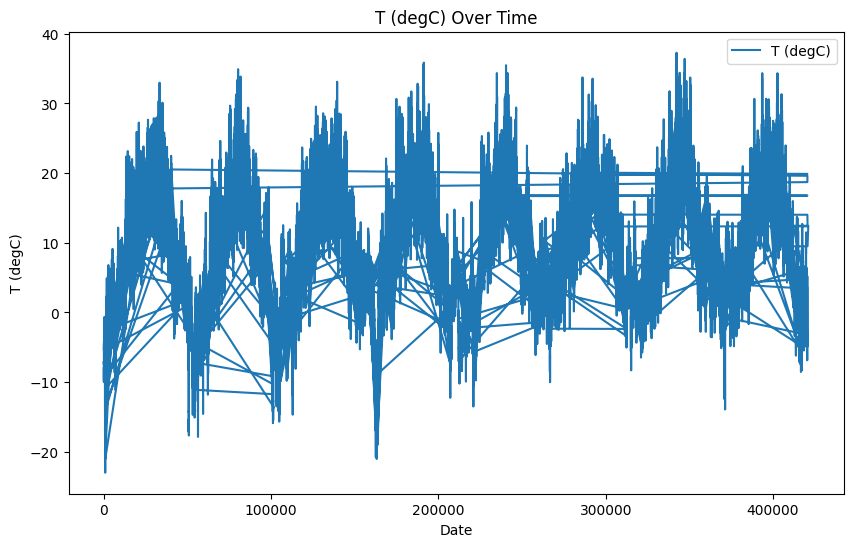

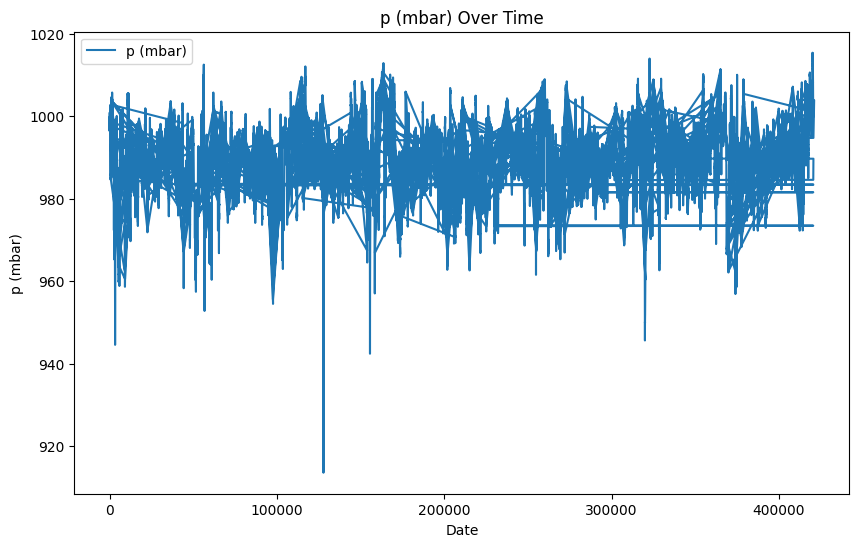

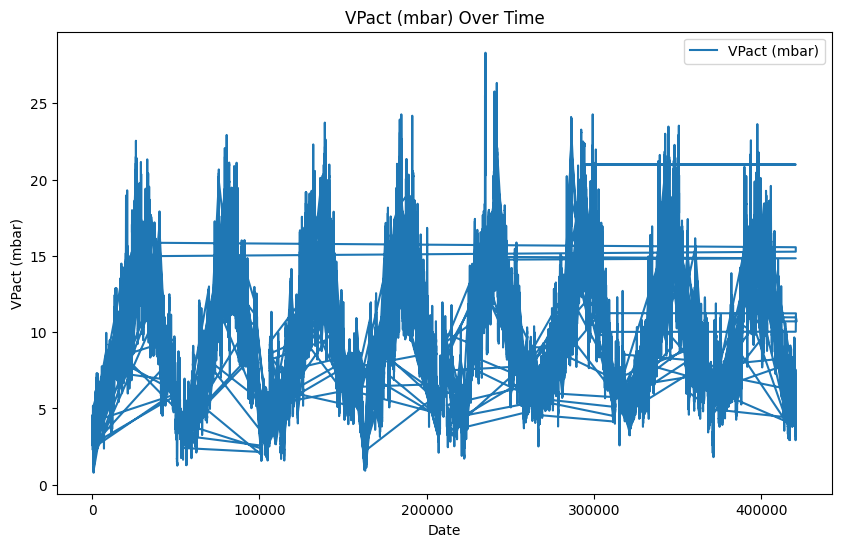

In [32]:
# 6. Choose 3 weather factor measurements and plot them. Analyze them for aspects like trend, seasonality and noise. (Hint: It might be useful to look at the years individually for every weather factor.)
import matplotlib.pyplot as plt
factors = ["T (degC)", "p (mbar)", "VPact (mbar)"]
# Plot each weather factor across the entire dataset
for factor in factors:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[factor], label=factor)
    plt.title(f"{factor} Over Time")
    plt.xlabel("Date")
    plt.ylabel(factor)
    plt.legend()
    plt.show()

## Task 3 - Basic Feature Engineering

Time series data often contains valuable information based on the use case that can be engineered from the existing dataset. An example would be features such as day of the week, weekends, week of the year, etc. In order to practice these possible feature engineering steps perform the following tasks:

1. Using the `Date Time` column create features for the day, month, year, hour and minute.
2. Based on these new features also create additional features such as a binary indicator if it is weekend or not (alternativly if it is weekday or not), what day of the week and what week of the year it is.

For some features additional feature engineering could be beneficial. Cyclical features such as the day of the week, the month or the week of the year could benefit from a representation where the value representing "Monday" is closer to the value representing "Sunday" than it is when simply encoding the days like this for example:

- Monday: 0
- Tuesday: 1
- Wedneyday: 2
- Thursday: 3
- Friday: 4
- Saturday: 5
- Sunday: 6

To address the cyclicity of such features cyclical encoding with sine/cosine transformation can be used as one possible approach.

3. Research how cyclical encoding of cyclical features can be done and implement it for all features in the dataset where you find it suitable. Give a reason for choosing exactly the features you chose.

(One explanation can be found in this blog post: https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/)


In [34]:
# 1. Using the `Date Time` column create features for the day, month, year, hour and minute.

### YOUR CODE STARTS HERE ###

df["Day"] = df["Date Time"].dt.day # TODO: Get the day of the timestamp
df["Month"] = df["Date Time"].dt.month # TODO: Get the month of the timestamp
df["Year"] = df["Date Time"].dt.year # TODO: Get the year of the timestamp
df["Hour"] = df["Date Time"].dt.hour # TODO: Get the hour of the timestamp
df["Minute"] = df["Date Time"].dt.minute # TODO: Get the minute of the timestamp

### YOUR CODE ENDS HERE ###

In [35]:
# 2. Based on these new features also create additional features such as a binary indicator if it is weekend or not (alternativly if it is weekday or not), what day of the week and what week of the year it is.

### YOUR CODE STARTS HERE ###

df["Day of the Week"] = df["Date Time"].dt.dayofweek # TODO: Get the day of the week of the timestamp
df["Weekend"] = df["Day of the Week"].apply(lambda x: 1 if x >= 5 else 0) # TODO: Create a binary feature indicating if it is weekend of not (1 if yes, 0 if no)
df["Week of the Year"] = df["Date Time"].dt.isocalendar().week # Get the week of the year of the timestamp
# Additional features if something comes to your mind

### YOUR CODE ENDS HERE ###

In [37]:
# 3. Research how cyclical encoding of cyclical features can be done and implement it for all features in the dataset where you find it suitable. Give a reason for choosing exactly the features you chose.
import numpy as np
cyclical_features = ["Hour", "Day of the Week", "Month"]
for feature in cyclical_features:
    max_val = df[feature].max() + 1  # Add 1 because the range is inclusive (e.g., 0-23 for hours)
    df[f"{feature}_sin"] = np.sin(2 * np.pi * df[feature] / max_val)
    df[f"{feature}_cos"] = np.cos(2 * np.pi * df[feature] / max_val)

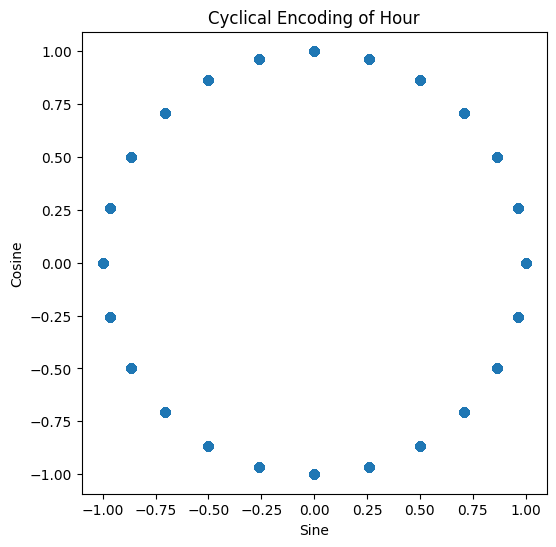

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(df["Hour_sin"], df["Hour_cos"], alpha=0.7)
plt.title("Cyclical Encoding of Hour")
plt.xlabel("Sine")
plt.ylabel("Cosine")
plt.axis("equal")
plt.show()